In [20]:
import csv 
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [4]:
emergency_generation_csv_path = "emergency_generation.csv"
demand_csv_path = "demand.csv"
breakdowns_csv_path = "breakdowns.csv"

emergency_generation_csv = "https://www.eskom.co.za/dataportal/wp-content/uploads/2022/03/Pumped_storage_gen_hours_gas_generation_and_manual_load_reduction.csv"
breakdowns_csv = "https://www.eskom.co.za/dataportal/wp-content/uploads/2022/03/Hourly_UCLF_and_OCLF_Trend.csv"
demand_csv = "https://www.eskom.co.za/dataportal/wp-content/uploads/2022/03/System_hourly_demand_and_available_capacity.csv"


emergency_generation = pd.read_csv(emergency_generation_csv)
breakdowns = pd.read_csv(breakdowns_csv)
demand = pd.read_csv(demand_csv)

# print(emergency_generation)
# print(breakdowns)


In [5]:
temp = pd.read_csv(emergency_generation_csv_path)
emergency_generation = pd.concat((emergency_generation, temp), axis=0)
emergency_generation = emergency_generation.where(emergency_generation['Drakensberg Gen Unit Hours']>0)
emergency_generation = emergency_generation.drop_duplicates(subset=['Date'])
emergency_generation = emergency_generation.sort_values(['Date'])

temp = pd.read_csv(breakdowns_csv_path)
breakdowns = pd.concat((breakdowns, temp), axis=0)
breakdowns = breakdowns.drop_duplicates(subset=['DateTimeKey']).sort_values(['DateTimeKey'])


temp = pd.read_csv(demand_csv_path)
demand = pd.concat((demand, temp), axis=0)
demand = demand.drop_duplicates(subset=['DateTimeKey']).sort_values(['DateTimeKey'])



In [6]:

emergency_generation.to_csv(emergency_generation_csv_path)

demand.to_csv(demand_csv_path)

breakdowns.to_csv(breakdowns_csv_path)

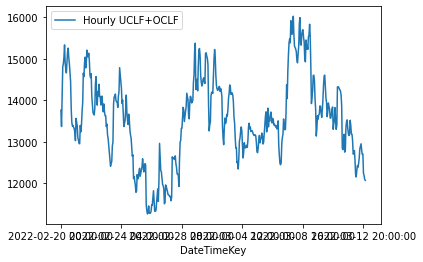

In [23]:
%matplotlib inline
breakdowns_plot = breakdowns.plot(x="DateTimeKey", y="Hourly UCLF+OCLF")
breakdowns_plot.format_xdata(dates)

